# Descriptive statistics with pandas

In [5]:
import os
import polars as pl
import matplotlib.pyplot as plt
import datetime

In [7]:
def loadDf(path):
    df = pl.read_csv(path)
    return df


def describeData(df):
    return df.describe()
ds = loadDf("./taker_buy_sell_volume.csv")


# EDA

In [11]:
ds.columns

['timestamp', 'buy_vol', 'sell_vol', 'buy_sell_ratio']

In [12]:
ds.shape

(13768, 4)

In [13]:
ds.head()

timestamp,buy_vol,sell_vol,buy_sell_ratio
i64,f64,f64,f64
1690233300000,172.917,125.523,1.3776
1690233600000,483.703,271.094,1.7843
1690233900000,324.171,223.937,1.4476
1690234200000,115.396,163.17,0.7072
1690234500000,841.502,499.905,1.6833


In [14]:
ds.tail()

timestamp,buy_vol,sell_vol,buy_sell_ratio
i64,f64,f64,f64
1694362200000,119.571,78.432,1.5245
1694362500000,220.92,127.619,1.7311
1694362800000,36.552,187.234,0.1952
1694363100000,370.405,488.762,0.7578
1694363400000,169.772,211.95,0.801


In [15]:
ds.null_count

<bound method DataFrame.null_count of shape: (13_768, 4)
┌───────────────┬─────────┬──────────┬────────────────┐
│ timestamp     ┆ buy_vol ┆ sell_vol ┆ buy_sell_ratio │
│ ---           ┆ ---     ┆ ---      ┆ ---            │
│ i64           ┆ f64     ┆ f64      ┆ f64            │
╞═══════════════╪═════════╪══════════╪════════════════╡
│ 1690233300000 ┆ 172.917 ┆ 125.523  ┆ 1.3776         │
│ 1690233600000 ┆ 483.703 ┆ 271.094  ┆ 1.7843         │
│ 1690233900000 ┆ 324.171 ┆ 223.937  ┆ 1.4476         │
│ 1690234200000 ┆ 115.396 ┆ 163.17   ┆ 0.7072         │
│ …             ┆ …       ┆ …        ┆ …              │
│ 1694362500000 ┆ 220.92  ┆ 127.619  ┆ 1.7311         │
│ 1694362800000 ┆ 36.552  ┆ 187.234  ┆ 0.1952         │
│ 1694363100000 ┆ 370.405 ┆ 488.762  ┆ 0.7578         │
│ 1694363400000 ┆ 169.772 ┆ 211.95   ┆ 0.801          │
└───────────────┴─────────┴──────────┴────────────────┘>

In [9]:
ds.describe()

describe,timestamp,buy_vol,sell_vol,buy_sell_ratio
str,f64,f64,f64,f64
"""count""",13768.0,13768.0,13768.0,13768.0
"""null_count""",0.0,0.0,0.0,0.0
"""mean""",1.6923e12,447.716745,457.516813,1.217613
"""std""",1.1924e9,955.125972,1029.835804,1.06521
"""min""",1.6902e12,0.407,0.041,0.0239
"""max""",1.6944e12,45381.252,47180.398,63.6341
"""median""",1.6923e12,210.5635,214.195,0.979
"""25%""",1.6913e12,112.573,115.141,0.6455
"""75%""",1.6933e12,432.78,435.113,1.5009


# PLOT

In [31]:
## helper function to plot
def plot(x, y, ylabel, title):
    x = [i for i in x]
    y = [i for i in y]
    plt.figure(figsize=(10, 10))
    plt.plot(x, y)
    plt.ylabel(ylabel)
    plt.xticks( rotation=25 )
    plt.title(title if title is not None else "")
    plt.show()
    plt.savefig(f"./{title}_plot.png")


In [32]:
time = ds['timestamp'].apply(lambda x:datetime.datetime.fromtimestamp(x//1000))

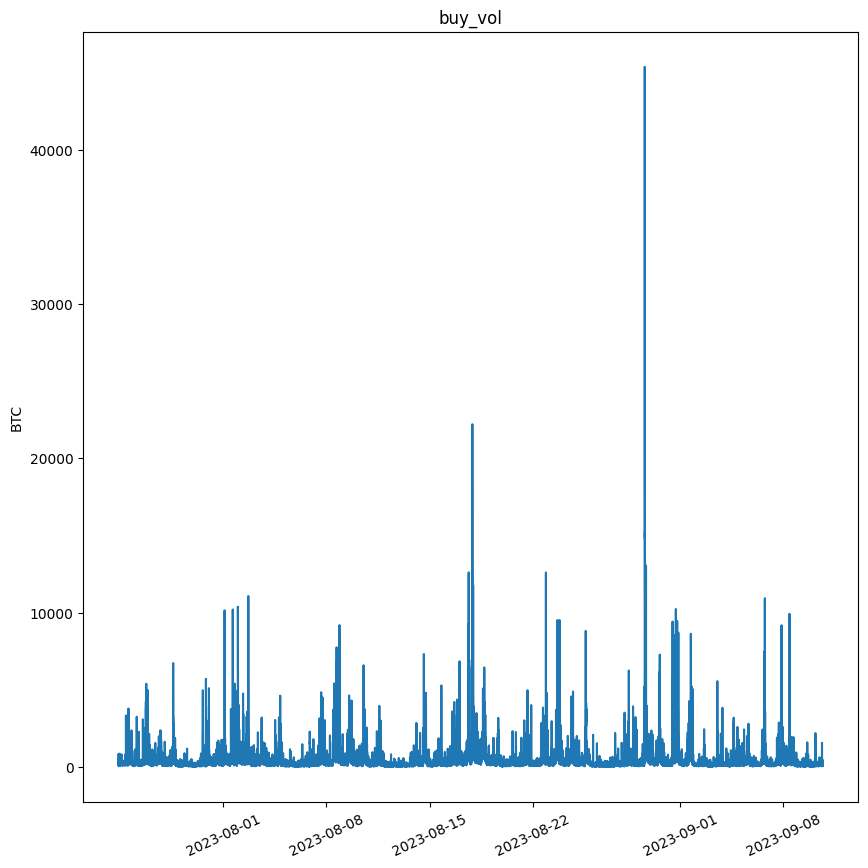

<Figure size 640x480 with 0 Axes>

In [33]:
plot(x=time, y=ds["buy_vol"], ylabel="BTC",title="buy_vol")

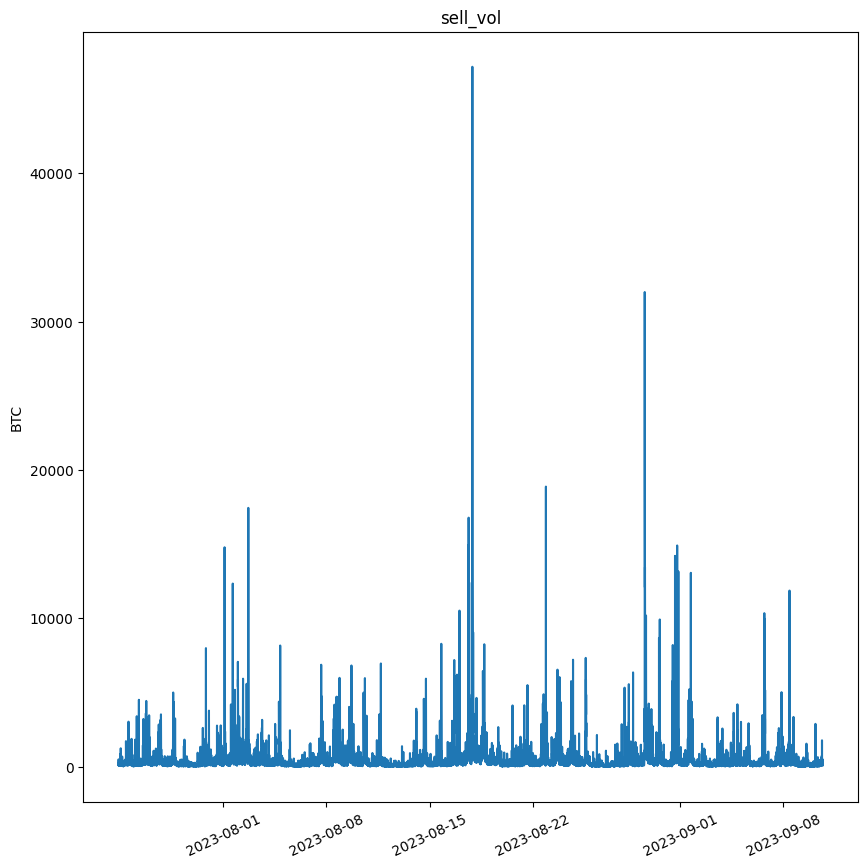

<Figure size 640x480 with 0 Axes>

In [34]:
plot(x=time, y=ds["sell_vol"], ylabel="BTC",title="sell_vol")

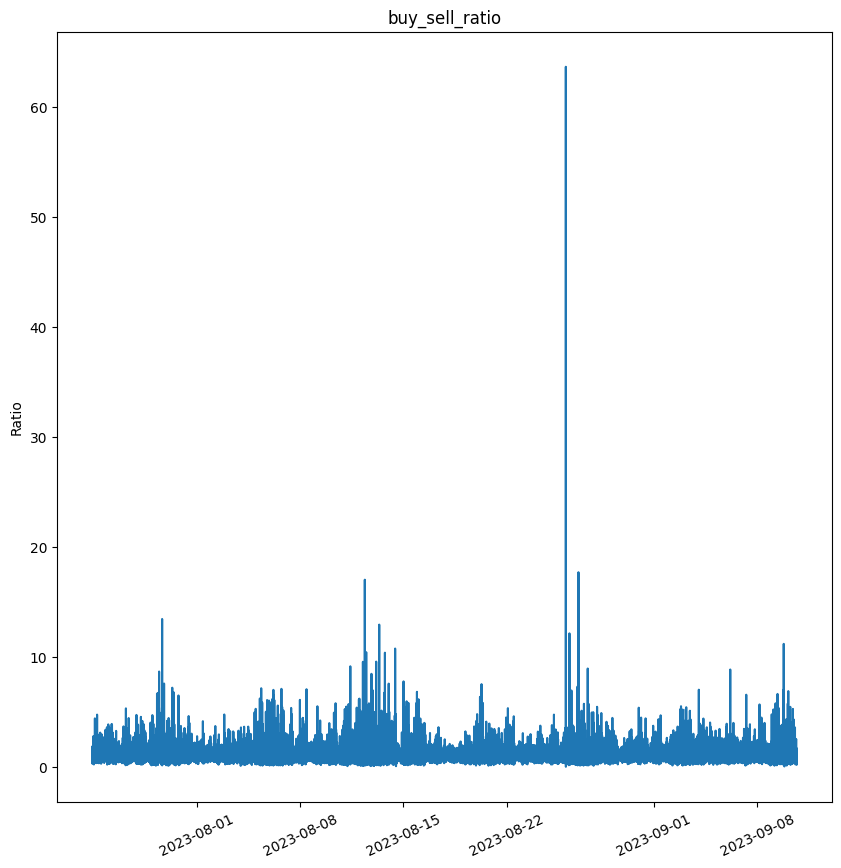

<Figure size 640x480 with 0 Axes>

In [35]:

plot(x=time, y=ds["buy_sell_ratio"], ylabel="Ratio",title = "buy_sell_ratio")